<a href="https://colab.research.google.com/github/JyothsnaGH/PythonforFinance/blob/main/K_means_Clustering_with_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import the packages. New packages today:


*   The Wine Dataset
*   K-means clustering algorithm.



In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans


from sklearn.datasets import load_diabetes
from sklearn.datasets import load_wine

In [64]:
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

### We are going to load the wine dataset. For more information on the Target and the features of this dataset, visit: https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-dataset

In [65]:
wine = load_wine(as_frame=True)
X, y = wine.data, wine.target

X = StandardScaler().fit_transform(X)

## How many clusters do we need? Let us use the elbow method to determine the optimal number of clusters.

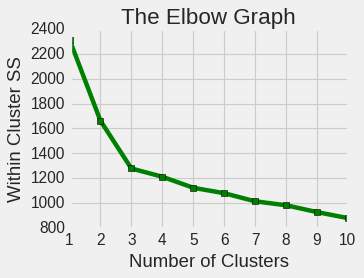

In [66]:
import matplotlib.style as style
style.available
style.use('fivethirtyeight')

wcss = {}
for i in range(1, 11):
	kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
	kmeans.fit(X)
	wcss[i] = kmeans.inertia_

plt.figure(figsize=(4,3))
plt.plot(wcss.keys(), wcss.values(), 'gs-')
plt.xlabel("Number of Clusters")
plt.title('The Elbow Graph')
plt.ylabel('Within Cluster SS')
plt.show()

In [67]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [68]:
kmeans.cluster_centers_ # co-ordinates of the cluster centers.
kmeans.labels_ # final output

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [69]:
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 52 out of 178 samples were correctly labeled.
Accuracy score: 0.29


## To plot the clusters, we need 2-D. We currently have 17 variables. Hence, let us reduce the data to 2 dimensions using Principal Components Analysis (PCA).

In [70]:
pca=PCA(n_components=2)
reduced_X=pd.DataFrame(data=pca.fit_transform(X),columns=['PCA1','PCA2'])
reduced_X.head() #Reduced Features


,PCA1,PCA2
0,3.316751,1.443463
1,2.209465,-0.333393
2,2.516740,1.031151
3,3.757066,2.756372
4,1.008908,0.869831


In [71]:
centers=pca.transform(kmeans.cluster_centers_)
centers

array([[-0.06725639, -1.76200147],
       [ 2.27025766,  0.87872825],
       [-2.72003575,  1.12565126]])

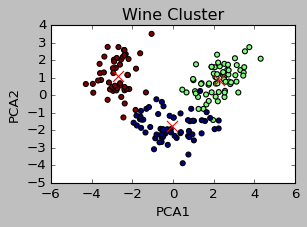

In [72]:
style.use('classic')
plt.figure(figsize=(4,3))

# Scatter plot
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'],c=kmeans.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Wine Cluster')
plt.tight_layout()


In [ ]:
style.available

## Now, K-means clustering and PCA for the diabetes dataset